# Analysis of the GNUplot file P.G. Reinhard provided

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

For simplicity, we copy & paste the two data sets contained in the GNUplot file into separate csv files. The data points are the contour ellipse of the 68% confidence region.

The variable labeled `variance` seems to be the standard deviation, actually.

We assume that the (commented-out) variable `alignment` is the Pearson correlation cofficient:

In [2]:
params_svmin = dict(
    label = "SV-min",
    data = pd.read_csv("SV-min.csv"),
    mean = np.array([0.16108, -15.910]),
    sig1 = 1.19302E-03,
    sig2 = 3.32045E-02,
    pearson = 0.18714
)

However, for `TOV`, variable `alignment` seems to have a different meaning. Empirically, we find that we need to take the square root, wit a negative sign.

In [3]:
params_tov = dict(
    label = "TOV",
    data = pd.read_csv("TOV.csv"),
    mean = np.array([0.161110997, -15.9396000]),
    sig1 = 1.70800090E-03,
    sig2 = 2.76002884E-02,
    pearson = -np.sqrt(3.51108E-02)
)

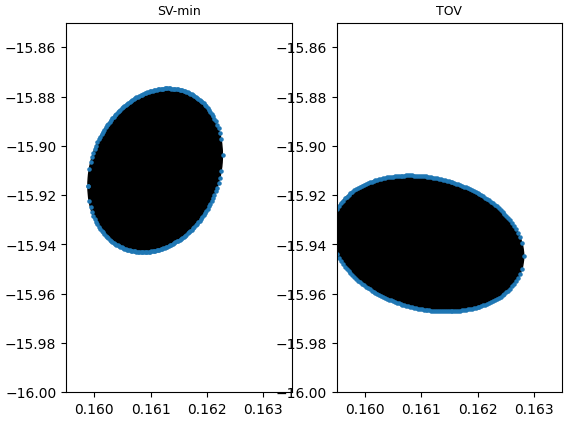

In [4]:
fig, axs = plt.subplots(1, 2)
from modules.plot_helpers import confidence_ellipse_mean_cov
all_params = [params_svmin, params_tov]
for iax, ax in enumerate(axs):
    params = all_params[iax]
    offdiag = params["pearson"] * params["sig1"] * params["sig2"]
    cov = np.array([[params["sig1"]**2, offdiag],
                    [offdiag, params["sig2"]**2]])
    confidence_ellipse_mean_cov(ax=ax,
                                mean=params["mean"],
                                cov=cov,
                                n_std=1,
                                edgecolor="k", facecolor="k")
    ax.scatter(params["data"]["rho0"], params["data"]["E/A"], s=5)
    ax.set_xlim(0.1595, 0.1635)
    ax.set_ylim(-16.0, -15.85)
    ax.set_title(params["label"])

With the interpretation of the variables described above, the confidence ellipses we obtain match well the ones P.G. Reinhard provided us with.

In [5]:
data = {
    "label": [params["label"] for params in all_params],
    "mean rho0": [params["mean"][0] for params in all_params],
    "mean E/A": [params["mean"][1] for params in all_params],
    "sigma rho0": [params["sig1"] for params in all_params],
    "sigma E/A": [params["sig2"] for params in all_params],
    "rho": [params["pearson"] for params in all_params]
}
df = pd.DataFrame(data=data)
df.to_csv("CovEllipse.dat", index=False)